
# Adding a background map to plots

This example shows how you can add a background basemap to plots created
with the geopandas ``.plot()`` method. This makes use of the
[contextily](https://github.com/geopandas/contextily) package to retrieve
web map tiles from several sources (OpenStreetMap, CartoDB). Also have a
look at contextily's 
[introduction guide](https://contextily.readthedocs.io/en/latest/intro_guide.html#Using-transparent-layers)
for possible new features not covered here.


In [1]:
import geopandas
import geodatasets
import contextily as cx

Let's use the NYC borough boundary data that is available in geopandas
datasets. Plotting this gives the following result:



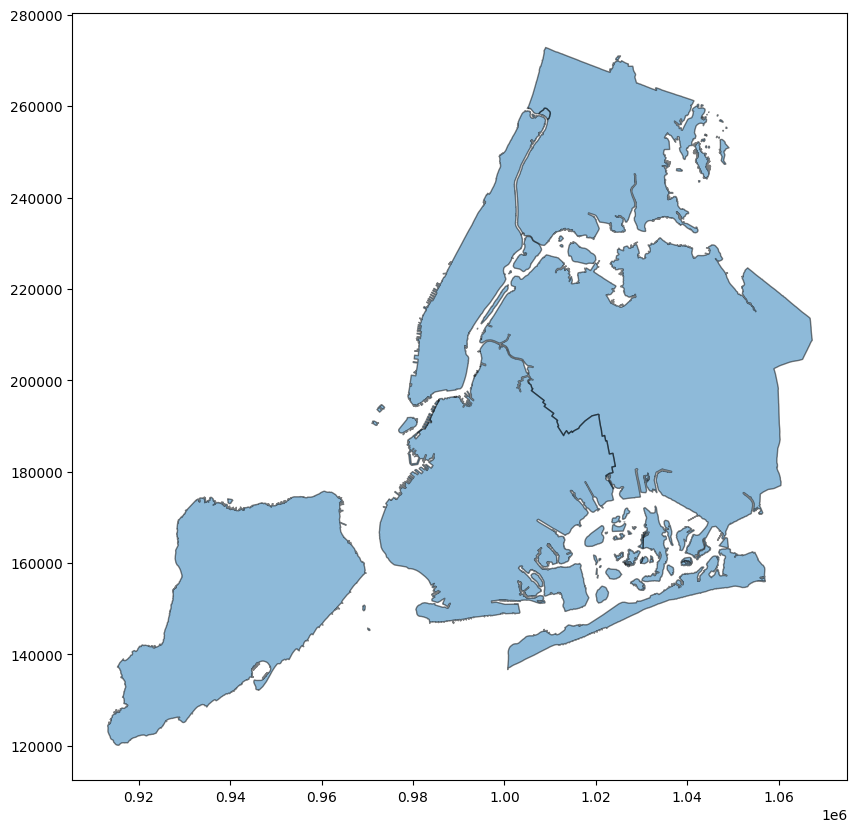

In [2]:
df = geopandas.read_file(geodatasets.get_path("nybb"))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")

## Matching coordinate systems 


Before adding web map tiles to this plot, we first need to ensure the
coordinate reference systems (CRS) of the tiles and the data match.
Web map tiles are typically provided in
[Web Mercator](https://en.wikipedia.org/wiki/Web_Mercator>)
([EPSG 3857](https://epsg.io/3857)), so let us first check what
CRS our NYC boroughs are in:

In [3]:
df.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Now we know the CRS do not match, so we need to choose in which
CRS we wish to visualize the data: either the CRS of the tiles,
the one of the data, or even a different one.

The first option to match CRS is to leverage the `to_crs` method
of GeoDataFrames to convert the CRS of our data, here to Web Mercator:

In [4]:
df_wm = df.to_crs(epsg=3857)

We can then use `add_basemap` function of contextily to easily add a
background map to our plot:

ConnectionError: HTTPSConnectionPool(host='a.tile.openstreetmap.fr', port=443): Max retries exceeded with url: /hot/11/604/769.png (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000231F5D40670>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

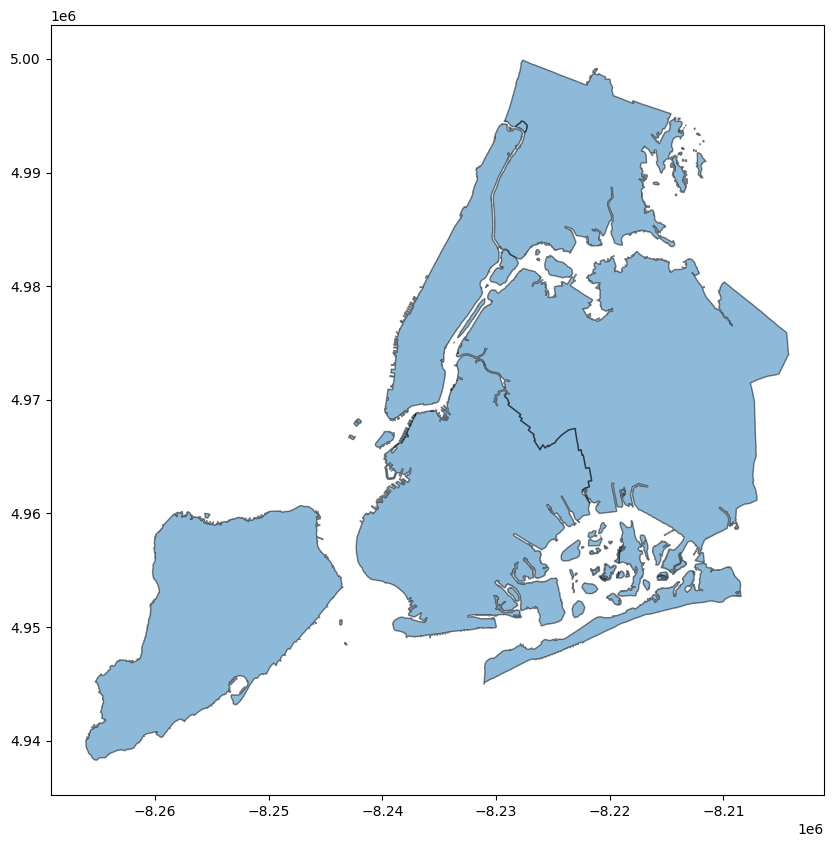

In [5]:
ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax)

If we want to convert the CRS of the tiles instead, which might be advisable
for large datasets, we can use the `crs` keyword argument of `add_basemap`
as follows:

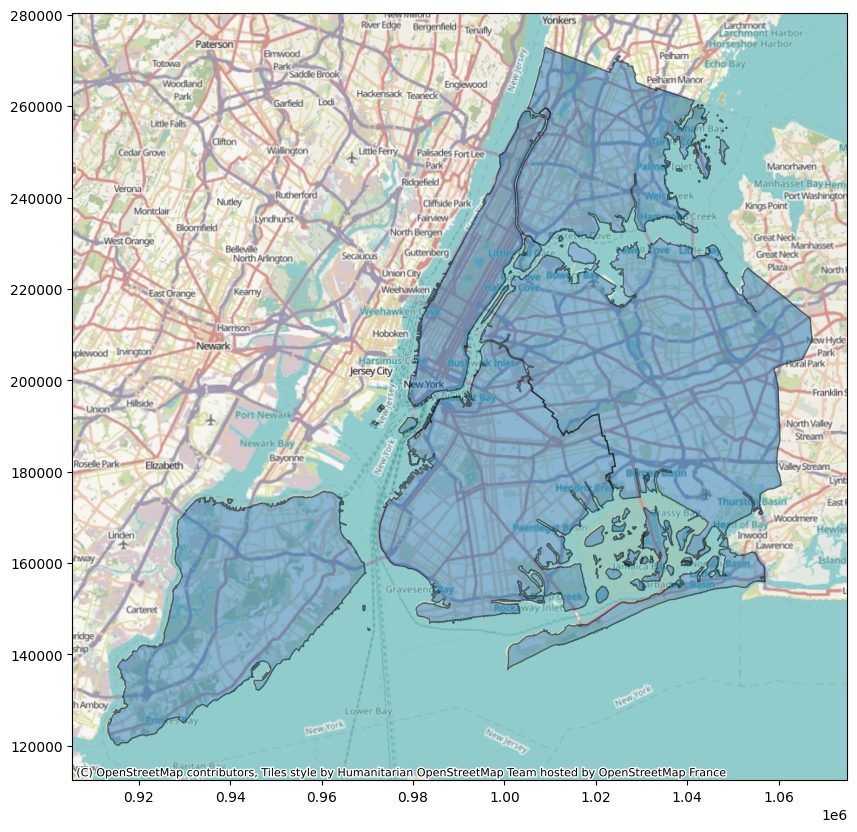

In [6]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax, crs=df.crs)

This reprojects map tiles to a target CRS which may in some cases cause a
loss of sharpness. See 
[contextily's guide on warping tiles](https://contextily.readthedocs.io/en/latest/warping_guide.html)
for more information on the subject.

## Controlling the level of detail

We can control the detail of the map tiles using the optional `zoom` keyword
(be careful to not specify a too high `zoom` level,
as this can result in a large download).:



In [ ]:
ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax, zoom=12)

## Choosing a different style

By default, contextily uses the Stamen Terrain style. We can specify a
different style using ``cx.providers``:



In [ ]:
ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
ax.set_axis_off()

## Adding labels as an overlay

Sometimes, when you plot data on a basemap, the data will obscure some important map elements, such as labels,
that you would otherwise want to see unobscured. Some map tile providers offer multiple sets of partially
transparent tiles to solve this, and `contextily` will do its best to auto-detect these transparent layers
and put them on top.

In [ ]:
ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels)

By splitting the layers like this, you can also independently manipulate the level of zoom on each layer,
for example to make labels larger while still showing a lot of detail.

In [ ]:
ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax, source=cx.providers.Stamen.Watercolor, zoom=12)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels, zoom=10)